# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup url for the api
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Check the response
# response = requests.get(query_url + city)
# response

In [4]:
# Print test
# response = requests.get(query_url + "Pisco").json()
# print(json.dumps(response, indent = 4, sort_keys = True))
# print(response.keys())
# print(cities[0])

In [5]:
# Create lists to store response values
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set counters
count = 0
sets = 1

# Create loop to perform api calls to make weather checks for each city
for city in cities:
    
    # Error Handling
    try:
        response = requests.get(query_url + city).json()
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Print log with city number and name using a conditional
        if count > 49:
            count = 1
            sets += 1
            
        else:
            count += 1

        print(f"Processing Record {count} of Set {sets} | {city}") 
        
    except:
        print(f"City not found. Skipping...")
        pass
   

Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | suntar
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | vespasiano
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | sompeta
Processing Record 15 of Set 1 | grand gaube
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | fairbanks
City not found. Skipping...
Processing Record 21 of Set 1 | khanewal
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | georgetown
Processing Reco

Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | varzea da palma
Processing Record 41 of Set 4 | sao jose dos campos
Processing Record 42 of Set 4 | rio claro
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | zaysan
Processing Record 47 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 4 | garowe
Processing Record 49 of Set 4 | rorvik
Processing Record 50 of Set 4 | healdsburg
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | kakrala
Processing Record 3 of Set 5 | quatre cocos
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | santa rosa
Processing Record 6 of Set 5 | kennett
Processing Record 7 of Set 5 | kabanjahe
Processing Record 8 of Set 5 | vestmanna
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | tuatapere
Processing Record 11 of Set 5 | comodoro rivadavia
Processing Record 12

Processing Record 30 of Set 8 | edd
Processing Record 31 of Set 8 | korocha
Processing Record 32 of Set 8 | uarini
Processing Record 33 of Set 8 | neftegorsk
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | leh
Processing Record 36 of Set 8 | villazon
Processing Record 37 of Set 8 | ternate
Processing Record 38 of Set 8 | dorado
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | tolaga bay
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | hanyang
Processing Record 43 of Set 8 | wattegama
Processing Record 44 of Set 8 | meaford
Processing Record 45 of Set 8 | elverum
Processing Record 46 of Set 8 | mapiripan
Processing Record 47 of Set 8 | gulabpura
Processing Record 48 of Set 8 | birjand
Processing Record 49 of Set 8 | kaeo
City not found. Skipping...
Processing Record 50 of Set 8 | nizhniy kuranakh
Processing Record 1 of Set 9 | saldanha
Processing Record 2 of Set 9 | thinadhoo
Processing Record 3 of Set 9 | m

Processing Record 19 of Set 12 | kushima
Processing Record 20 of Set 12 | igarka
Processing Record 21 of Set 12 | kampot
Processing Record 22 of Set 12 | arandis
City not found. Skipping...
Processing Record 23 of Set 12 | north bend
Processing Record 24 of Set 12 | saint stephen
Processing Record 25 of Set 12 | sola
Processing Record 26 of Set 12 | caravelas
Processing Record 27 of Set 12 | krasnoshchekovo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary for the dataframe
weather_dict = {
    "City ID": city_id,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create dataframe
city_data_df = pd.DataFrame(weather_dict)

In [7]:
# Create csv file from the city data dataframe
city_data_df.to_csv(output_data_file, index = False, header = True)

# Display the dataframe header
city_data_df.head(10)

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,2980080,Saint-François,96,FR,1597839556,33,46.42,3.91,87.80,9.17
1,6201424,Mataura,90,NZ,1597839556,95,-46.19,168.86,45.00,1.01
2,3466704,Castro,100,BR,1597839432,96,-24.79,-50.01,53.85,5.28
3,3445026,Vila Velha,20,BR,1597839408,78,-20.33,-40.29,78.01,10.29
4,5848280,Kapaa,40,US,1597839557,78,22.08,-159.32,78.80,12.75
5,2156643,Mount Gambier,40,AU,1597839557,87,-37.83,140.77,46.40,10.29
6,2015913,Suntar,95,RU,1597839557,51,62.14,117.63,61.07,1.34
7,3466165,Cidreira,75,BR,1597839557,88,-30.18,-50.21,60.30,10.04
8,3445162,Vespasiano,20,BR,1597839558,72,-19.69,-43.92,68.00,3.36
9,546105,Nikolskoye,0,RU,1597839558,43,59.70,30.79,71.60,6.71


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Check to see if there are cities with humidity > 100
clean_city_data_df = city_data_df.loc[city_data_df["Humidity"] > 100]
clean_city_data_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

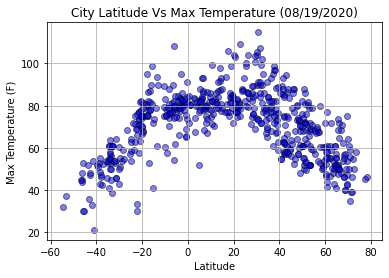

In [12]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.5)
plt.title("City Latitude Vs Max Temperature (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()


This graph is showing the highest temperatures of cities in relation to the equator (0 degrees latitude). As expected, the highest temperatures are closer to 0 degrees. 

## Latitude vs. Humidity Plot

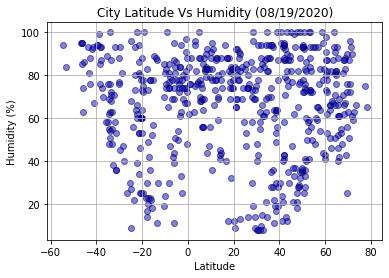

In [13]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.5)
plt.title("City Latitude Vs Humidity (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

This graph is showing the humidity of cities in relation to the equator (0 degrees latitude). Theres almost an even distribution of humidities in the negative and positive latitude directions with most of the grouping between 60-100% no matter where the city is located.

## Latitude vs. Cloudiness Plot

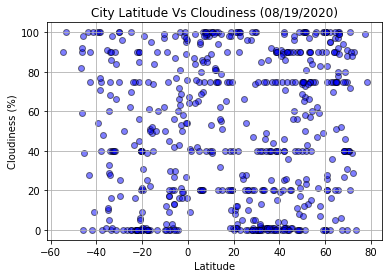

In [14]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.5)
plt.title("City Latitude Vs Cloudiness (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

This graph is showing cloud cover of cities in relation to where they are located from the equator (0 degrees latitude). Theres an even distribution of cloud cover. Latitude does not seem to show any relation to cloud cover.

## Latitude vs. Wind Speed Plot

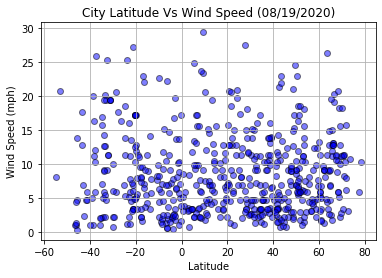

In [15]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.5)
plt.title("City Latitude Vs Wind Speed (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

This graph is showing wind speed in a city based on where it is located in relation to the equator (0 degrees latitude). Theres an even distribution in the negative and positive latitude directions with most of the grouping evenly spread out between -60 and 80 degrees latitude and under 15 mph.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    print(f"R-Squared: {round(rvalue ** 2, 2)}")
    return line_eq

In [17]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = city_data_df.loc[city_data_df["Lat"] >= 0]
s_hem = city_data_df.loc[city_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared: 0.45


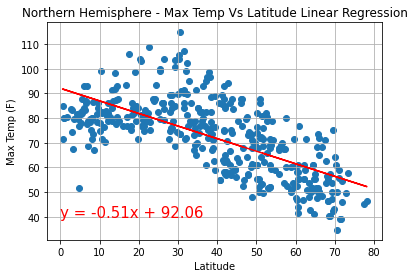

In [18]:
plt.annotate(lin_regress(n_hem["Lat"], n_hem["Max Temp"]), (0, 40), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared: 0.61


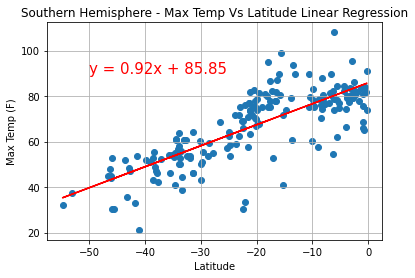

In [19]:
plt.annotate(lin_regress(s_hem["Lat"], s_hem["Max Temp"]), (-50, 90), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.show()

As expected, both regressions show highest temperatures closer the cities are to the equator (0 degrees).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared: 0.0


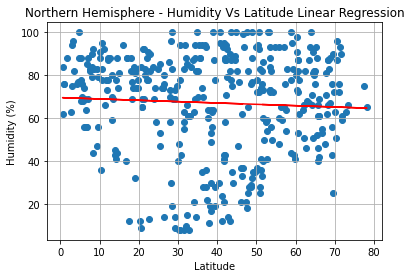

In [20]:
plt.annotate(lin_regress(n_hem["Lat"], n_hem["Humidity"]), (0, 0), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Humidity Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared: 0.02


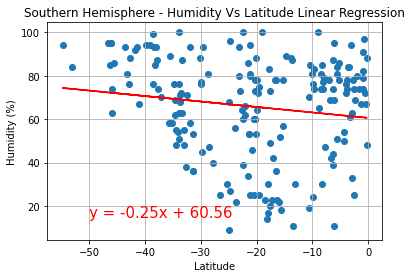

In [21]:
plt.annotate(lin_regress(s_hem["Lat"], s_hem["Humidity"]), (-50, 15), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Humidity Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

There is no relationship between latitude and humidity. Both r-sqaureds are zero and looking at how scattered the data is, theres no predictability here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared: 0.0


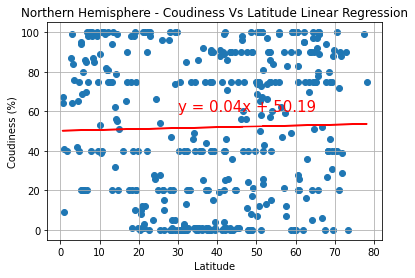

In [22]:
plt.annotate(lin_regress(n_hem["Lat"], n_hem["Cloudiness"]), (30, 60), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Coudiness Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Coudiness (%)")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared: 0.02


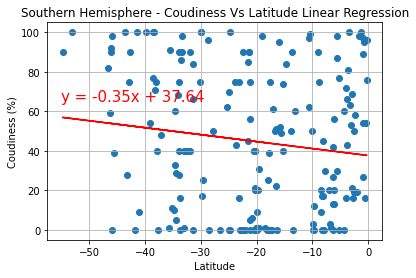

In [23]:
plt.annotate(lin_regress(s_hem["Lat"], s_hem["Cloudiness"]), (-55, 65), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Coudiness Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Coudiness (%)")
plt.grid()
plt.show()

There is no relationship between latitude and cloud cover. Both r-sqaureds are zero and looking at how scattered the data is, theres no predictability here.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared: 0.0


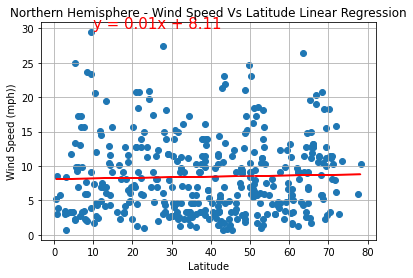

In [24]:
plt.annotate(lin_regress(n_hem["Lat"], n_hem["Wind Speed"]), (10, 30), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Wind Speed Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared: 0.02


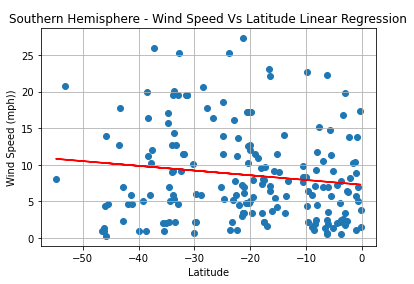

In [25]:
plt.annotate(lin_regress(s_hem["Lat"], s_hem["Wind Speed"]), (-50, 30), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Wind Speed Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid()
plt.show()

There is no relationship between latitude and wind speed. Both r-sqaureds are zero and looking at how scattered the data is, theres no predictability here.